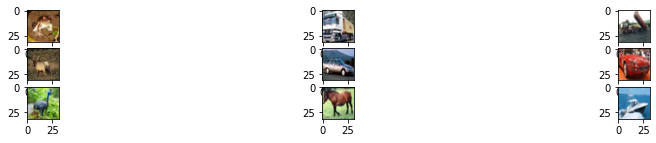

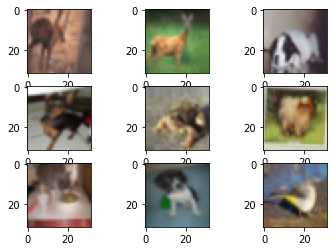

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset = keras.datasets.cifar10.load_data()

(x_train, y_train), (x_test, y_test) = dataset

#["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes_names = [0,1,2,3,4,5,6,7,8,9]

#normalizovanje rgb u opseg od 0 do 1
x_train = x_train / 255 
x_test = x_test / 255

y_train = y_train.reshape(-1,) 
y_test = y_test.reshape(-1,)

#cnn layers: convolution, pooling, convolution+relu, pooling, flatten, dense network na kraju

for i in range(0, 9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()


#IMAGE AUGMENTATION
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 15,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range= 0.1
)
datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
  for i in range(0, 9):
    plt.subplot(330+1+i)
    plt.imshow(x_batch[i])
  plt.show()
  break



cnn = keras.models.Sequential([
              
              keras.layers.Conv2D(filters=40, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),             
              keras.layers.BatchNormalization(axis=-1),
              keras.layers.MaxPooling2D((2,2)),

              keras.layers.Conv2D(filters=80, kernel_size=(3,3), activation='relu'),              
              keras.layers.BatchNormalization(axis=-1),
              keras.layers.MaxPooling2D((2,2)),

              #dense
              #keras.layers.Dropout(0.1),
              keras.layers.Flatten(),
              keras.layers.Dense(500, activation = 'relu'),
              keras.layers.BatchNormalization(),
              keras.layers.Dense(10, activation = 'softmax'), 
              ])

In [ ]:
MODEL_PATH = './drive/MyDrive/model1.h5'

#cnn.load_weights(MODEL_PATH)
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#cnn.fit(x_train, y_train, epochs=10)
from keras.callbacks import ModelCheckpoint
filepath = './drive/MyDrive/best1.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             patience=10,
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks=[checkpoint]
cnn.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=100, callbacks=callbacks, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - ETA: 0s - loss: 1.4017 - accuracy: 0.5160
Epoch 1: val_loss improved from inf to 2.03568, saving model to ./drive/MyDrive/best1.hdf5
391/391 [==============================] - 144s 364ms/step - loss: 1.4017 - accuracy: 0.5160 - val_loss: 2.0357 - val_accuracy: 0.3360
Epoch 2/100
391/391 [==============================] - ETA: 0s - loss: 1.0804 - accuracy: 0.6205
Epoch 2: val_loss improved from 2.03568 to 1.09059, saving model to ./drive/MyDrive/best1.hdf5
391/391 [==============================] - 144s 368ms/step - loss: 1.0804 - accuracy: 0.6205 - val_loss: 1.0906 - val_accuracy: 0.6174
Epoch 3/100
391/391 [==============================] - ETA: 0s - loss: 0.9538 - accuracy: 0.6675
Epoch 3: val_loss did not improve from 1.09059
391/391 [==============================] - 147s 375ms/step - loss: 0.9538 - accuracy: 0.6675 - val_loss: 1.1995 - val_accuracy: 0.6034
Epoch 4/100
391/391 [==============================] - ETA: 0s - loss: 

In [ ]:
MODEL_PATH = './drive/MyDrive/model1.h5'
cnn.evaluate(x_test, y_test)
cnn.save_weights(MODEL_PATH)

313/313 [==============================] - 13s 41ms/step - loss: 0.7431 - accuracy: 0.8047


Confusion matrix: 


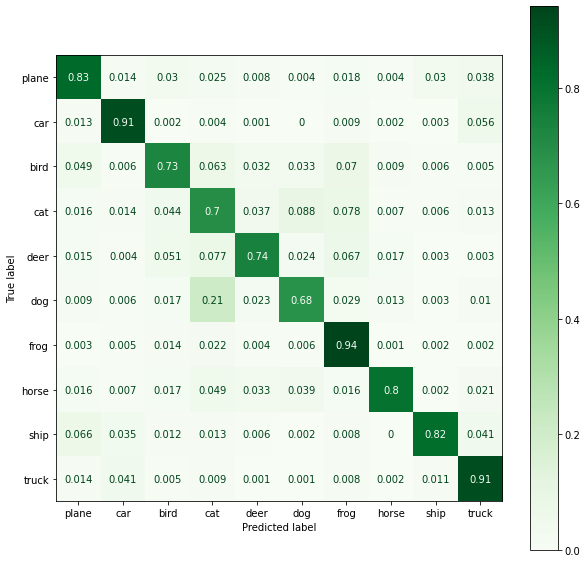

In [ ]:
#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

classes_names = [0,1,2,3,4,5,6,7,8,9]
y_pred = cnn.predict(x_test)
y_pred=y_pred.reshape(-1,)
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(elem) for elem in y_pred]

classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("Confusion matrix: ")
cm = confusion_matrix(y_test, y_pred_classes, normalize="true", labels=classes_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
